In [1]:
###------NYC DEMOGRAPHIC DATA-----###

In [2]:
# Data exploration
import pandas as pd
import numpy as np
from data_utility import readCsvFile

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Read CSV
demo_original = readCsvFile('../Data/NYC_Demographics.csv')
demo_original

,Borough,Estimated Population,Land Area (sq mi),Density (per/sq mi),Poverty Rate (%),Mean Household Income,Median Household Income,Adults Not Graduated (%)
0,Bronx,1471160,42.10,34653,27.1,46298,34156,38.38
1,Brooklyn,2648771,70.82,37137,21.9,60020,41406,33.29
2,Manhattan,1664727,22.83,72033,17.6,121549,64217,22.10
3,Queens,2358582,108.53,21460,12.0,67027,53171,23.86
4,Staten Island,479458,58.37,8112,9.8,81498,66985,18.43
5,Total,8622698,302.65,173995,NaN,376392,259935,NaN


In [4]:
#Get the total mean population of NYC based on borough
""" Bronx - 1, Brooklyn - 2, Manhattan - 3, Queens - 4, Staten Island - 5 """

bronxPop = demo_original['Estimated Population'][0]
brookylnPop = demo_original['Estimated Population'][1]
manhattanPop = demo_original['Estimated Population'][2]
queensPop = demo_original['Estimated Population'][3]
statIslandPop = demo_original['Estimated Population'][4]

In [5]:
#Calculate % of population in each borough

brookDense = (brookylnPop/ demo_original['Estimated Population'][5])*100
bronxDense = (bronxPop/ demo_original['Estimated Population'][5])*100
manhattanDense = (manhattanPop/ demo_original['Estimated Population'][5])*100
queensDense = (queensPop/ demo_original['Estimated Population'][5])*100
statIslandDense = (statIslandPop/ demo_original['Estimated Population'][5])*100

In [6]:
#Calculate % of Area in each borough

bronxArea = (demo_original['Density (per/sq mi)'][0]/ demo_original['Density (per/sq mi)'][5])*100
brookArea = (demo_original['Density (per/sq mi)'][1]/ demo_original['Density (per/sq mi)'][5])*100
manhattanArea = (demo_original['Density (per/sq mi)'][2]/ demo_original['Density (per/sq mi)'][5])*100
queensArea = (demo_original['Density (per/sq mi)'][3]/ demo_original['Density (per/sq mi)'][5])*100
statIslandArea = (demo_original['Density (per/sq mi)'][4]/ demo_original['Density (per/sq mi)'][5])*100

In [7]:
#Calculate % of household income in each borough

brookIncome = (demo_original['Mean Household Income'][1]/ demo_original['Mean Household Income'][5])*100
bronxIncome = (demo_original['Mean Household Income'][0]/ demo_original['Mean Household Income'][5])*100
manhattanIncome = (demo_original['Mean Household Income'][2]/ demo_original['Mean Household Income'][5])*100
queensIncome = (demo_original['Mean Household Income'][3]/ demo_original['Mean Household Income'][5])*100
statIslandIncome = (demo_original['Mean Household Income'][4]/ demo_original['Estimated Population'][5])*100

In [8]:
boro_pop = { 'Borough': ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND'],
             'Population (%)' : [bronxDense,brookDense,manhattanDense,queensDense,statIslandDense],
             'Area (%)' : [brookArea,manhattanArea,bronxArea,queensArea,statIslandArea]
           }

In [9]:
boro_pop_df = pd.DataFrame(boro_pop)
print(boro_pop_df)

         Borough  Population (%)   Area (%)
0          BRONX       17.061481  21.343717
1       BROOKLYN       30.718587  41.399466
2      MANHATTAN       19.306335  19.916090
3         QUEENS       27.353179  12.333688
4  STATEN ISLAND        5.560417   4.662203


In [10]:
boro_income = { 'Borough': ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND'],
             'Income (%)' : [bronxIncome,brookIncome,manhattanIncome,queensIncome,statIslandIncome]
           }

In [11]:
boro_income_df = pd.DataFrame(boro_income)
print(boro_income_df)

         Borough  Income (%)
0          BRONX   12.300474
1       BROOKLYN   15.946141
2      MANHATTAN   32.293194
3         QUEENS   17.807764
4  STATEN ISLAND    0.945157


In [12]:
boro_demo = boro_pop_df.merge(boro_income_df, on='Borough')

In [13]:
boro_demo['Income/Population'] = boro_demo['Income (%)']/boro_demo['Population (%)']
boro_demo['Income/Area'] = boro_demo['Income (%)']/boro_demo['Area (%)']

In [14]:
boro_demo.head()

,Borough,Population (%),Area (%),Income (%),Income/Population,Income/Area
0,BRONX,17.061481,21.343717,12.300474,0.720950,0.576304
1,BROOKLYN,30.718587,41.399466,15.946141,0.519104,0.385177
2,MANHATTAN,19.306335,19.916090,32.293194,1.672673,1.621463
3,QUEENS,27.353179,12.333688,17.807764,0.651031,1.443831
4,STATEN ISLAND,5.560417,4.662203,0.945157,0.169979,0.202727


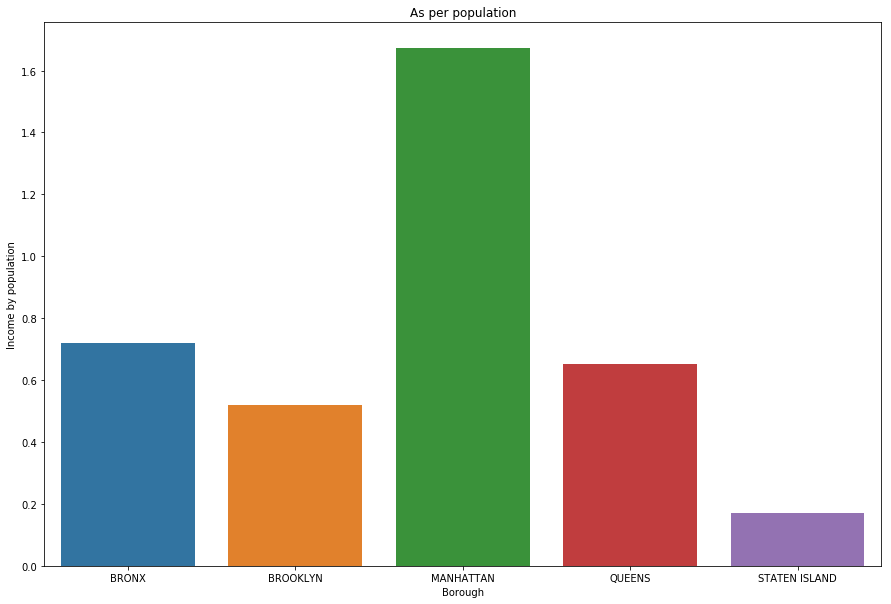

In [18]:
import seaborn as sns
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Borough', y='Income/Population', data=boro_demo, ax=ax)
plt.ylabel('Income by population')
plt.title('As per population')
plt.show()

[Text(0,0,'BROOKLYN'),
 Text(0,0,'MANHATTAN'),
 Text(0,0,'BRONX'),
 Text(0,0,'QUEENS'),
 Text(0,0,'STATEN ISLAND')]

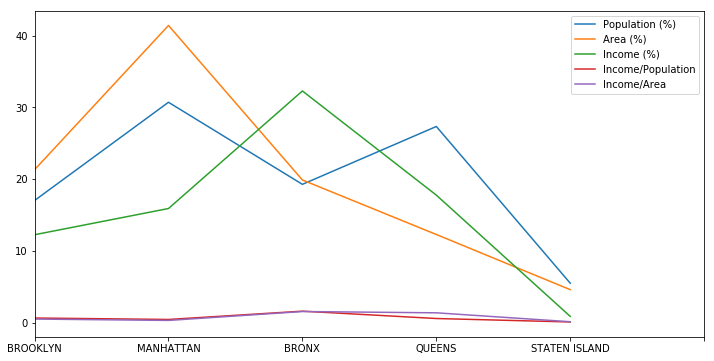

In [19]:
my_plot = boro_demo.plot(kind ='line',legend = True,figsize=(12,6))
my_plot.set_xlim(0,5)
my_plot.set_xticklabels(['BROOKLYN','MANHATTAN','BRONX','QUEENS','STATEN ISLAND'])

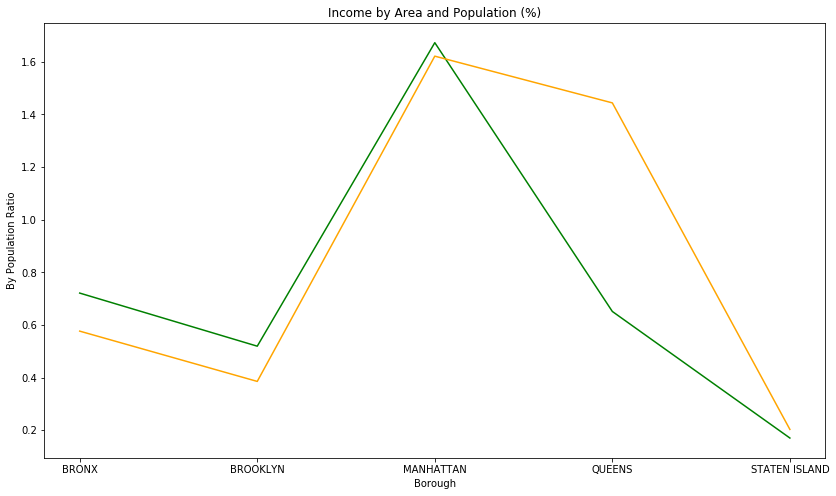

In [20]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(boro_demo['Borough'], boro_demo['Income/Population'], color='g')
plt.plot(boro_demo['Borough'],boro_demo['Income/Area'], color='orange')
plt.xlabel('Borough')
plt.ylabel('By Population Ratio')
plt.title('Income by Area and Population (%)')
plt.show()